In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml

letters, y = fetch_openml("letter", version=1, return_X_y=True, parser="auto")

feature_names = letters.columns.tolist()
letters["group"] = y  # Add group labels (letters A-Z)

# Verify groups
print("Groups:", letters["group"].unique())  # ['A', 'B', ..., 'Z']
print("Samples per group:\n", letters["group"].value_counts())

Groups: ['Z', 'P', 'S', 'H', 'F', ..., 'T', 'C', 'G', 'B', 'J']
Length: 26
Categories (26, object): ['A', 'B', 'C', 'D', ..., 'W', 'X', 'Y', 'Z']
Samples per group:
 group
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64


In [2]:
letters

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,group
0,2,4,4,3,2,7,8,2,9,11,7,7,1,8,5,6,Z
1,4,7,5,5,5,5,9,6,4,8,7,9,2,9,7,10,P
2,7,10,8,7,4,8,8,5,10,11,2,8,2,5,5,10,S
3,4,9,5,7,4,7,7,13,1,7,6,8,3,8,0,8,H
4,6,7,8,5,4,7,6,3,7,10,7,9,3,8,3,7,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5,10,5,8,3,4,10,7,8,12,10,9,2,9,2,6,C
19996,4,7,6,5,3,7,8,2,10,12,6,8,1,9,6,8,Z
19997,4,8,4,6,4,7,8,7,4,10,7,6,3,9,3,7,O
19998,4,11,4,8,3,0,2,4,6,1,0,7,0,8,0,8,L


In [3]:
grouped_data = []
for letter in sorted(letters["group"].unique()):  # A, B, ..., Z
    mask = letters["group"] == letter
    samples = letters[mask].drop("group", axis=1).values # Remove class column
    grouped_data.append(samples)

# Structure: grouped_data[0] = all "A" samples, grouped_data[1] = "B", etc.
print(f"Number of groups (letters): {len(grouped_data)}")  # 26
print(f"Samples per group (e.g., 'A'): {len(grouped_data[0])}")  # ~789-813
print(f"Features per sample: {len(grouped_data[0][0])}")  # 16

Number of groups (letters): 26
Samples per group (e.g., 'A'): 789
Features per sample: 16


In [4]:
datasets = grouped_data

In [5]:
from src.ocsmm.OneClassSMMClassifier import OneClassSMMClassifier
classifier = OneClassSMMClassifier(nu=0.2)
classifier.fit(datasets)

Best gamma found.

Kappa matrix calculated.

Found the alphas.



In [6]:
decision, y_pred = classifier.predict(datasets)

Calculating kappa.

calculating rho.

[2.51067263 2.5106726  2.51067264 2.51067264 2.51067264 2.51067255
 2.5106725  2.51067251 2.5106726  2.51067258]


In [7]:
decision

array([ 3.76501834e-08,  3.05021552e-01,  1.41870071e-08,  4.28954846e-01,
        3.27452086e-01,  7.74075152e-02,  4.28359328e-01,  6.12363210e-01,
        1.37501839e-01,  5.00000539e-08,  5.72417012e-01,  4.85058855e-08,
        5.05336937e-08,  4.25893181e-01,  4.81089977e-01, -3.43508031e-08,
        2.98064538e-01,  3.81005861e-01,  3.54478713e-01, -9.04462456e-08,
        2.12501848e-01, -8.05809703e-08,  1.05974731e-08,  6.54854503e-01,
        4.71032459e-02, -6.09628081e-09])

In [8]:
y_pred

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1.])

In [9]:
outlier_indices = [i for i, value in enumerate(y_pred) if value == -1]
outlier_indices

[15, 19, 21, 25]

In [10]:
from src.explanation_algorithms.OCSMMSHAP import OCSMMSHAP
ocsmm_shap = OCSMMSHAP(X=datasets, classifier=classifier, decision=decision)
ocsmm_shap.fit_ocsmmshap(X=datasets, num_coalitions=2**len(feature_names))

Calculating projections:  52%|█████▏    | 34200/65535 [1:32:48<1:25:15,  6.13it/s]

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}

In [ ]:
shapley_values = ocsmm_shap.return_deterministic_shapley_values()

In [ ]:
import numpy as np
np.save("shapley_values_letter_before.npy", shapley_values)

In [ ]:
shapley_values = np.load("shapley_values_letter_before.npy")

In [ ]:
shapley_values

array([[ 0.5661653 ,  0.8314601 ,  0.7219748 ,  0.9694792 ,  0.2865572 ,
         0.40479958,  1.2795472 ,  1.7975788 ,  0.5149801 ,  0.41725954,
         0.7992986 ,  0.20487717,  1.5379419 ,  1.5026267 ,  1.9214185 ,
         1.3822784 ,  0.9916537 ,  0.30181876,  1.2744621 ,  0.13044885,
         0.49287954,  1.1214608 ,  1.4711791 ,  1.4541386 ,  0.21128309,
         1.1877826 ],
       [ 0.7241158 ,  0.76074755,  0.8999908 ,  1.0141525 ,  0.31417882,
         0.45997795,  1.3475598 ,  1.6815566 ,  0.49844512,  0.5269228 ,
         0.66707975,  0.08805837,  1.2585232 ,  1.3469161 ,  2.1178632 ,
         1.4865717 ,  1.0632643 ,  0.24204266,  1.0204042 ,  0.34367603,
         0.26237473,  1.1989632 ,  1.4230807 ,  1.3614377 ,  0.50130004,
         1.2221093 ],
       [ 0.66279995,  0.94020385,  0.6607082 ,  1.002186  ,  0.33960196,
         0.55868053,  1.1800585 ,  1.8251193 ,  0.61808217,  0.31755215,
         0.56538373,  0.07609674,  1.378157  ,  1.4426231 ,  1.8546464 ,
       

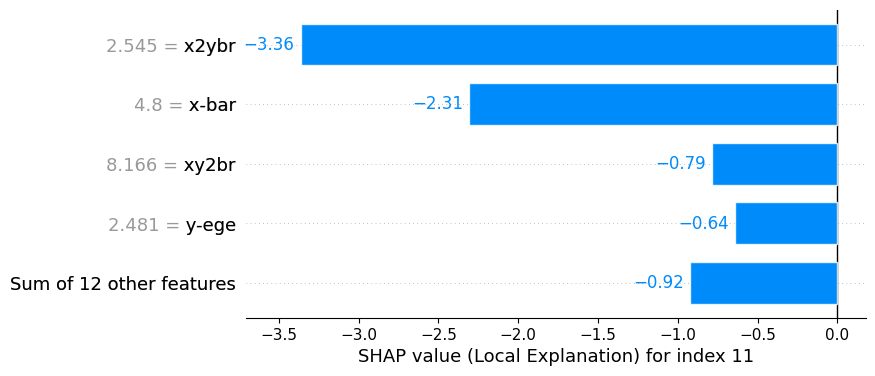

In [ ]:
from src.utils.visualisation.deterministic_values import local_bar_plot_ocsmm, global_bar_plot_ocsmm
local_bar_plot_ocsmm(shapley_values.T, 5, feature_names=feature_names, datasets=datasets)

In [ ]:
local_bar_plot_ocsmm(shapley_values.T, 19, feature_names=feature_names, datasets=datasets)

In [ ]:
local_bar_plot_ocsmm(shapley_values.T, 21, feature_names=feature_names, datasets=datasets)

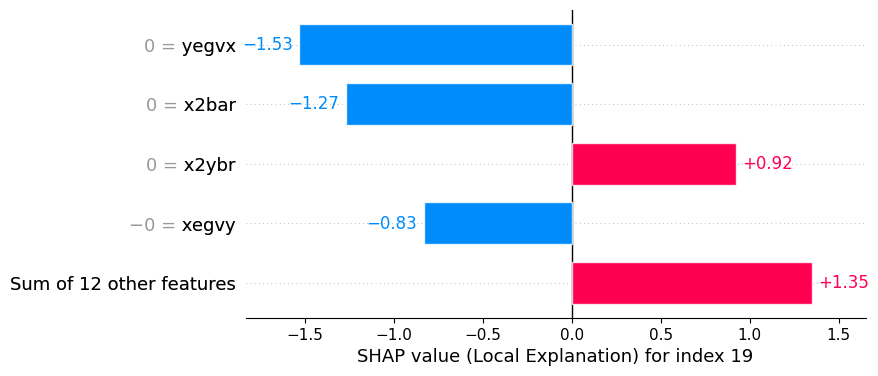

In [ ]:
local_bar_plot_ocsmm(shapley_values.T, 25, feature_names=feature_names, datasets=datasets)

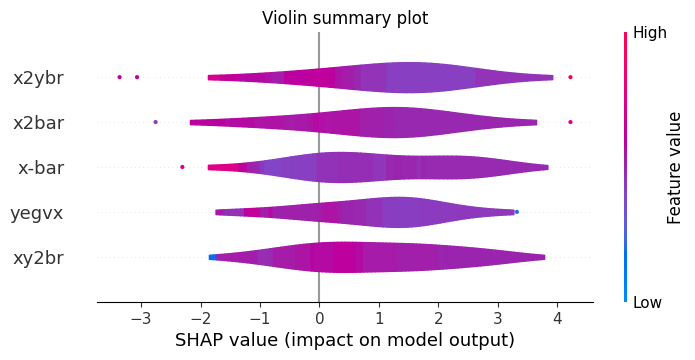

In [ ]:
from src.utils.visualisation.deterministic_values import summary_plot_ocsmm
summary_plot_ocsmm(shapley_values=shapley_values.T, feature_names=feature_names, datasets=datasets)

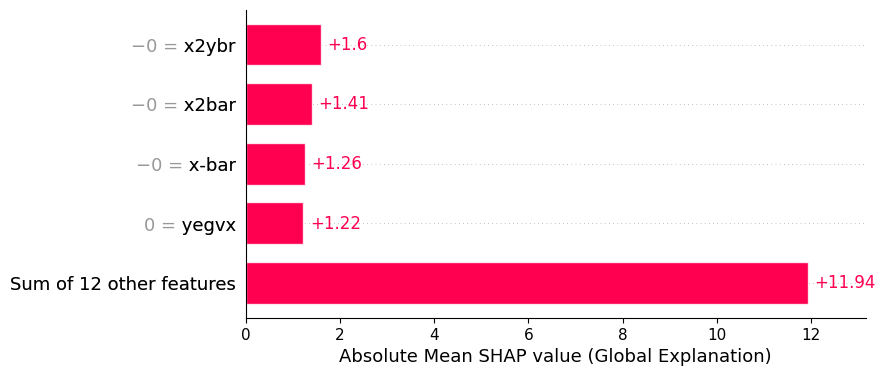

In [ ]:
# global importance measure
mean_abs_shap_values = np.abs(shapley_values.T).mean(axis=0)  

# Call bar_plot for global explanation
global_bar_plot_ocsmm(mean_abs_shap_values, feature_names=feature_names, datasets=datasets)

In [ ]:
a_group_idx = 0  # A=0, B=1, ..., P=15, ..., Z=25
for sample in grouped_data[a_group_idx]:
    sample[0] *= 2  # Perturb x-box (feature index 0)
    sample[3] *= 3  # Perturb high(feature index 3)

In [ ]:
grouped_data[0]

array([[ 6, 11,  5, ...,  6,  4,  9],
       [ 8, 10,  6, ...,  7,  3,  8],
       [ 6,  5,  5, ...,  6,  3,  6],
       ...,
       [ 4,  7,  4, ...,  6,  2,  8],
       [ 4,  6,  3, ...,  6,  1,  8],
       [ 8, 11,  6, ...,  7,  1,  8]], shape=(789, 16))

In [ ]:
classifier = OneClassSMMClassifier(nu=0.2)

In [ ]:
classifier.fit(datasets)

Best gamma found.

Kappa matrix calculated.

Found the alphas.



In [ ]:
decision, y_pred = classifier.predict(datasets)

Calculating kappa.

calculating rho.

[1.54585328 1.63949677 1.6394971  1.63949745 1.63949737 1.6394962
 1.63949596 1.63949633 1.63949706 1.63949673]


In [ ]:
decision

array([-0.08427915,  0.1868896 ,  0.00936434,  0.27258243,  0.20678078,
        0.05394825,  0.28284914,  0.39873736,  0.09837981,  0.00936467,
        0.37755459,  0.00936502,  0.00936495,  0.28677613,  0.32217749,
        0.00936378,  0.24076385,  0.24111178,  0.22471251,  0.00936353,
        0.15039195,  0.00936391,  0.00936464,  0.42726288,  0.05506248,
        0.0093643 ])

In [ ]:
y_pred

array([-1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [ ]:
outlier_indices = [i for i, value in enumerate(y_pred) if value == -1]
outlier_indices

[0]

In [ ]:
# ocsmm_shap = OCSMMSHAP(X=datasets, classifier=classifier, decision=decision)
# ocsmm_shap.fit_ocsmmshap(X=datasets, num_coalitions=2**len(feature_names))

In [ ]:
# shapley_values = ocsmm_shap.return_deterministic_shapley_values()

In [ ]:
import numpy as np
# np.save("shapley_values_letter_after.npy", shapley_values)

In [ ]:
shapley_values = np.load("shapley_values_letter_after.npy")

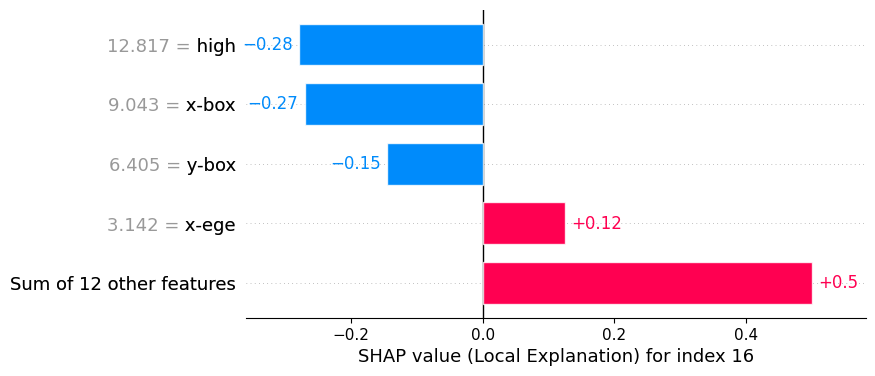

In [ ]:
local_bar_plot_ocsmm(shapley_values.T, 16, feature_names=feature_names, datasets=datasets)

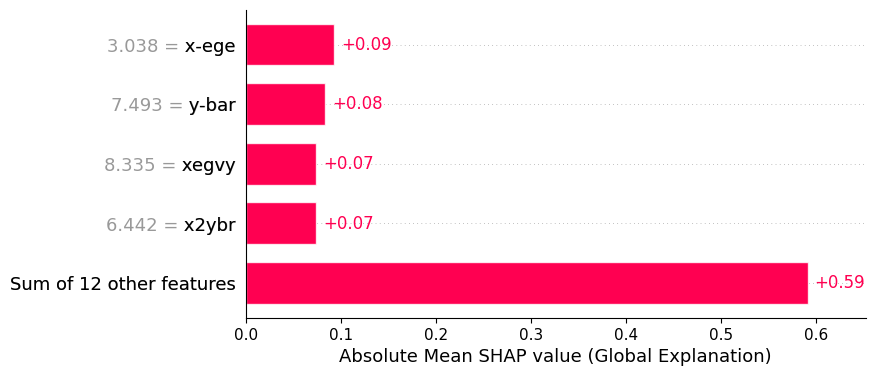

In [ ]:
# global importance measure
mean_abs_shap_values = np.abs(shapley_values.T).mean(axis=0)  

# Call bar_plot for global explanation
global_bar_plot_ocsmm(mean_abs_shap_values, feature_names=feature_names, datasets=datasets)

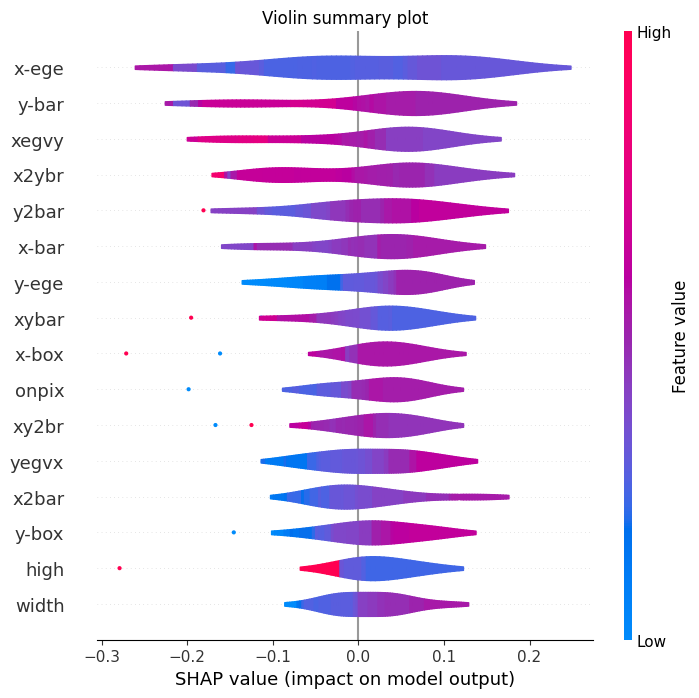

In [ ]:
summary_plot_ocsmm(shapley_values=shapley_values.T, feature_names=feature_names, datasets=datasets)